## Importância das features

## Métodos:
1. Recursive feature elimination
2. Correlação
3. Seleção baseada em clustering

In [3]:
#importando os modulos
import sys
sys.path.append('euthyroid_sick_syndrome')
from utils import *
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV


In [4]:
#Carregando o dataset
dataset = pd.read_csv('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')
output_label_dataset = dataset['classification']
dataset = dataset.drop(['classification'], axis=1)

#Balanceando dos dados 
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)

#Dividindo o dataset em treino e teste
#80 % para treino e 20% para teste
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

## RFE Recursive feature elimination

importância das features: 
 [6.61938456e-02 6.34472970e-03 2.46568566e-02 8.83839848e-04
 6.87201332e-05 1.38812104e-03 9.45024363e-03 9.21050921e-03
 3.57786788e-04 8.98663017e-04 2.51717537e-04 7.27126328e-06
 1.46744939e-03 9.37790036e-02 5.62030166e-01 6.87311959e-02
 9.05220247e-02 6.37578562e-02]
Coluna: 0, Selecionado False, Rank: 2.000
Coluna: 1, Selecionado False, Rank: 5.000
Coluna: 2, Selecionado False, Rank: 3.000
Coluna: 3, Selecionado False, Rank: 7.000
Coluna: 4, Selecionado False, Rank: 13.000
Coluna: 5, Selecionado False, Rank: 9.000
Coluna: 6, Selecionado False, Rank: 4.000
Coluna: 7, Selecionado False, Rank: 6.000
Coluna: 8, Selecionado False, Rank: 12.000
Coluna: 9, Selecionado False, Rank: 10.000
Coluna: 10, Selecionado False, Rank: 11.000
Coluna: 11, Selecionado False, Rank: 14.000
Coluna: 12, Selecionado False, Rank: 8.000
Coluna: 13, Selecionado True, Rank: 1.000
Coluna: 14, Selecionado True, Rank: 1.000
Coluna: 15, Selecionado True, Rank: 1.000
Coluna: 16, Sele

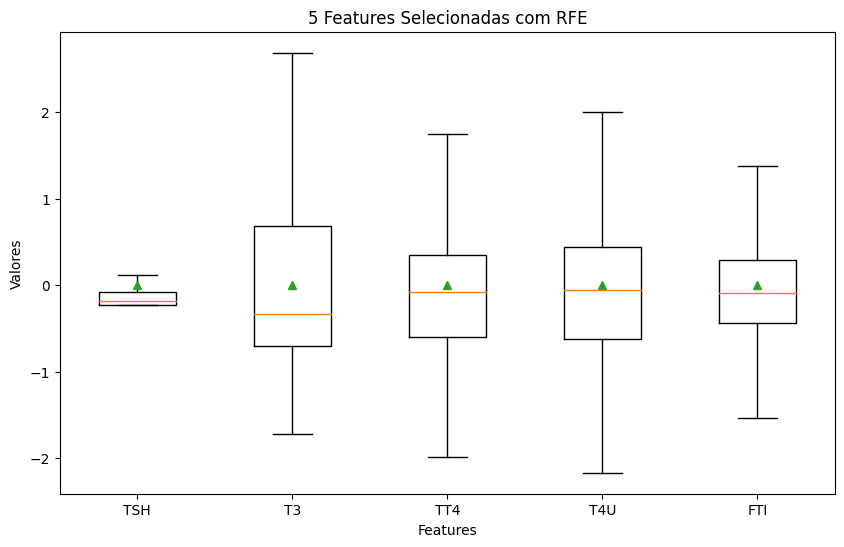

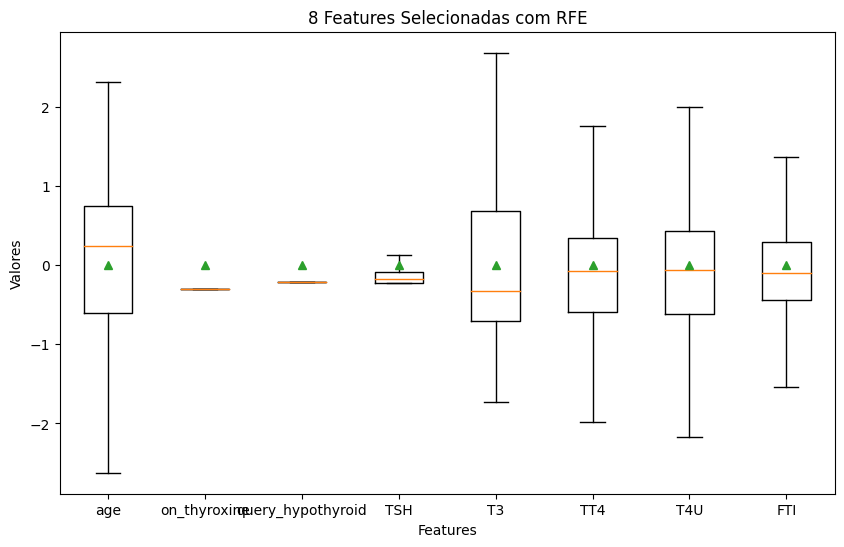

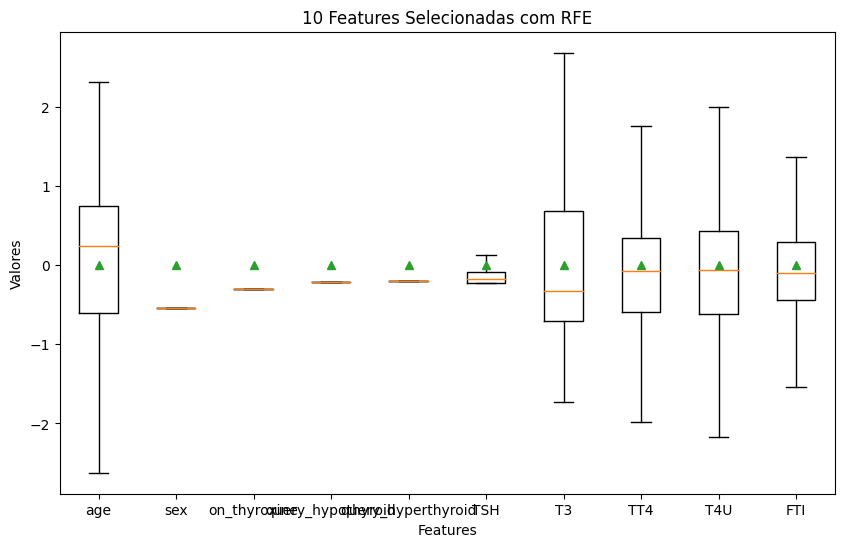

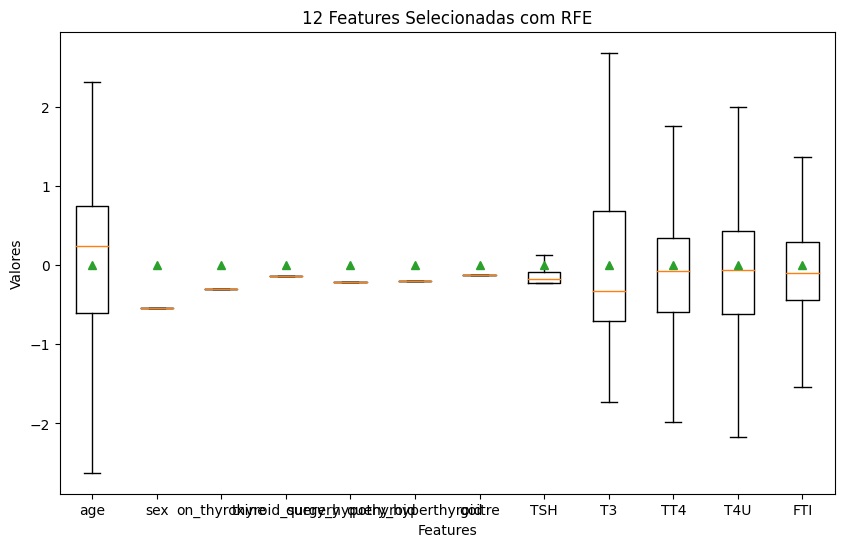

In [5]:
#Selecionando features Usando RFE (Recursive feature elimination)

model = RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=26,
max_features='sqrt', min_samples_split=40, n_estimators=100)
model.fit(input_train, output_train)
'''
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_depth': np.arange(10, 30, 5),
        'n_estimators': [10, 30, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

model = GridSearchCV(estimator = model, param_grid = param_grid)
model.fit(input_train, output_train)
print(model.best_params_)
'''

print("importância das features: \n", model.feature_importances_)

# Definir o RFE com 3 recursos a serem selecionados, ou seja ele está selecionando as 3 melhores features
for j in [5, 8, 10, 12]:
 
 rfe = RFE(estimator=model, n_features_to_select = j)

 # Executar o RFE no conjunto de treinamento
 rfe.fit(input_train, output_train)

 # Verificando os recursos selecionados
 for i in range(input_train.shape[1]):
  print('Coluna: %d, Selecionado %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

 #mostrando as features selecionadas
 print(dataset.columns[rfe.support_])

 # Selecionar os recursos do conjunto de treinamento e teste
 input_train_rfe = rfe.transform(input_train)
 X_test_rfe = rfe.transform(input_test)

 feature_values = [input_train_rfe[:, i] for i in range(input_train_rfe.shape[1])]
 selected_feature_names = dataset.columns[rfe.support_]

 # Criando um novo modelo com os recursos selecionados
 model.fit(input_train_rfe, output_train)

 # Avaliando a acuracia do modelo no conjunto de teste

 y_pred = model.predict(X_test_rfe)

 accuracy(output_test, y_pred)
 plt.figure(figsize=(10, 6))
 plt.boxplot(feature_values, labels=selected_feature_names, showmeans=True, showfliers=False)
 plt.title('{} Features Selecionadas com RFE'.format(j))
 plt.xlabel('Features')
 plt.ylabel('Valores')
 plt.savefig('RFE_{}.png'.format(j), dpi=300, bbox_inches='tight')

Este método remove recursivamente as features menos importantes de um conjunto completo de features até que o desempenho do modelo pare de melhorar. Ele usa um modelo de aprendizado de máquina para avaliar o desempenho do modelo após a remoção de cada feature.
Neste método foi usado o Random Forest para selecionar as features mais importantes. Ele treina várias árvores aleatorias com todas as features disponíveis e, em seguida, usa a importância relativa das features para selecionar as mais importantes.


## Resultados

### Com ajuste

5 features ['age', 'TSH', 'T3', 'T4U', 'FTI']

8 features ['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']

10 features ['age', 'sex', 'on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid',
'TSH', 'T3', 'TT4', 'T4U', 'FTI']

12 features ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'query_hypothyroid',
'query_hyperthyroid', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

---

### Sem ajuste

5 features ['age', 'TSH', 'T3', 'TT4', 'T4U']

8 features ['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']

10 features ['age', 'sex', 'on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid',
'TSH', 'T3', 'TT4', 'T4U', 'FTI']

12 features ['age', 'sex', 'on_thyroxine', 'thyroid_surgery', 'query_hypothyroid',
'query_hyperthyroid', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


## Correlação

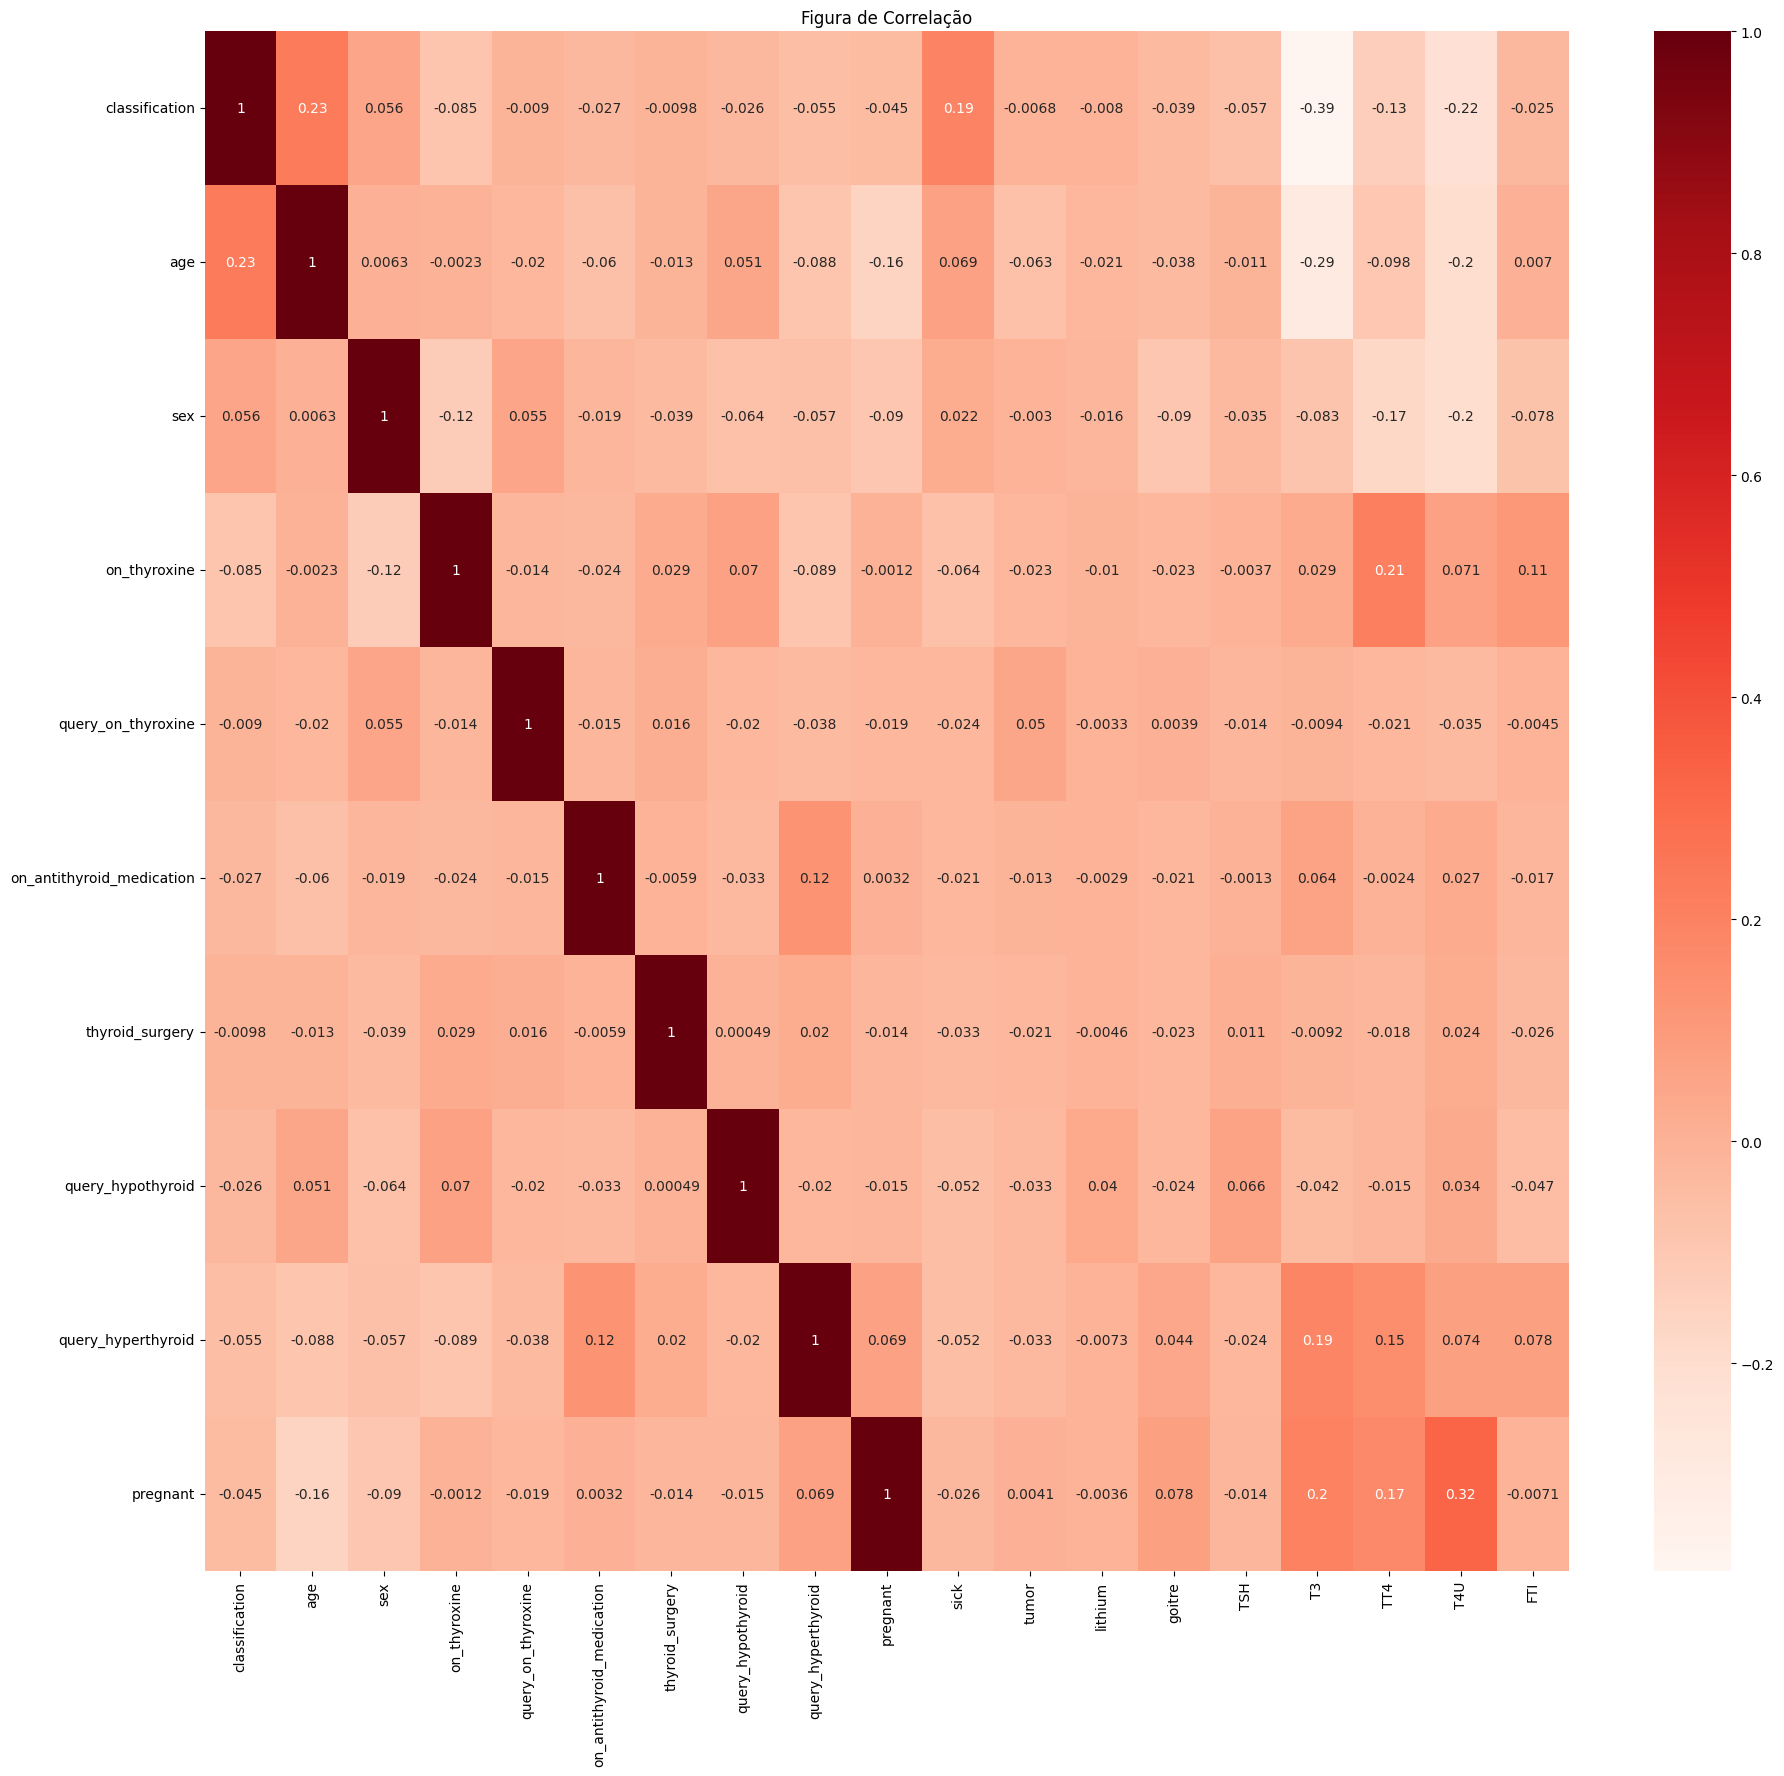

In [30]:
plt.figure(figsize=(22,20))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Figura de Correlação')
plt.savefig('Correlacao.png', dpi=300, bbox_inches='tight')

Este método seleciona as features que têm alta correlação com a variável de saída. Ele usa uma matriz de correlação para identificar as features mais importantes.

## Seleção baseada em clustering

/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recursos selecionados:  Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
       'query_hyperthyroid', 'pregnant', 'sick', 'goitre'],
      dtype='object')


/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recursos selecionados:  Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
       'query_hyperthyroid', 'pregnant', 'sick', 'goitre'],
      dtype='object')


/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recursos selecionados:  Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
       'query_hyperthyroid', 'pregnant', 'sick', 'goitre'],
      dtype='object')


/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recursos selecionados:  Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
       'query_hyperthyroid', 'pregnant', 'sick', 'goitre'],
      dtype='object')


/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recursos selecionados:  Index(['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
       'query_hyperthyroid', 'pregnant', 'sick', 'goitre'],
      dtype='object')


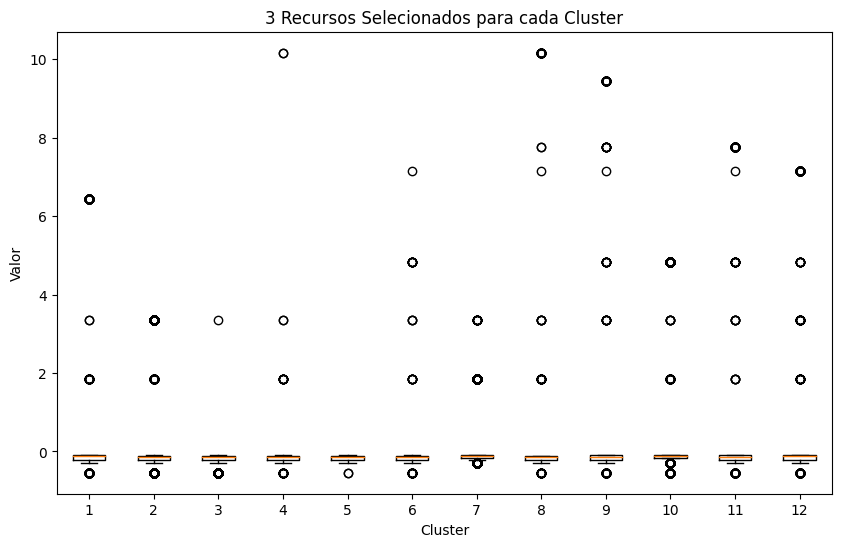

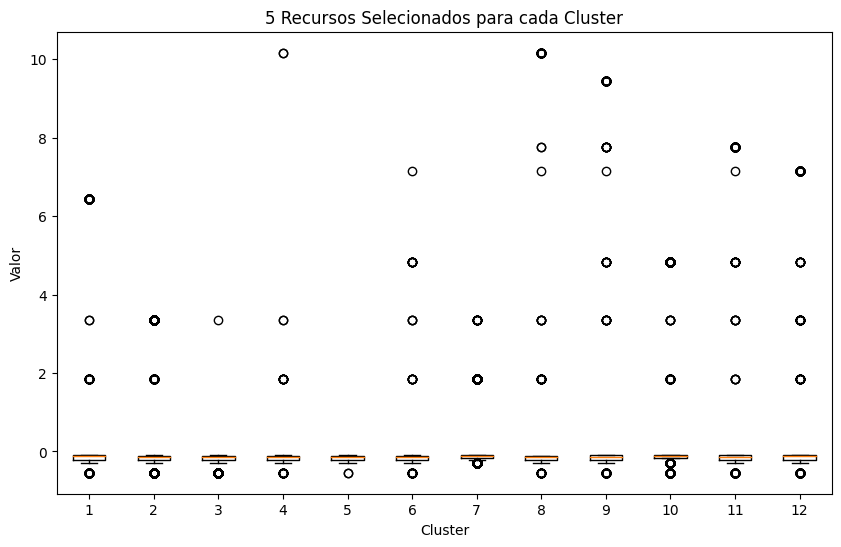

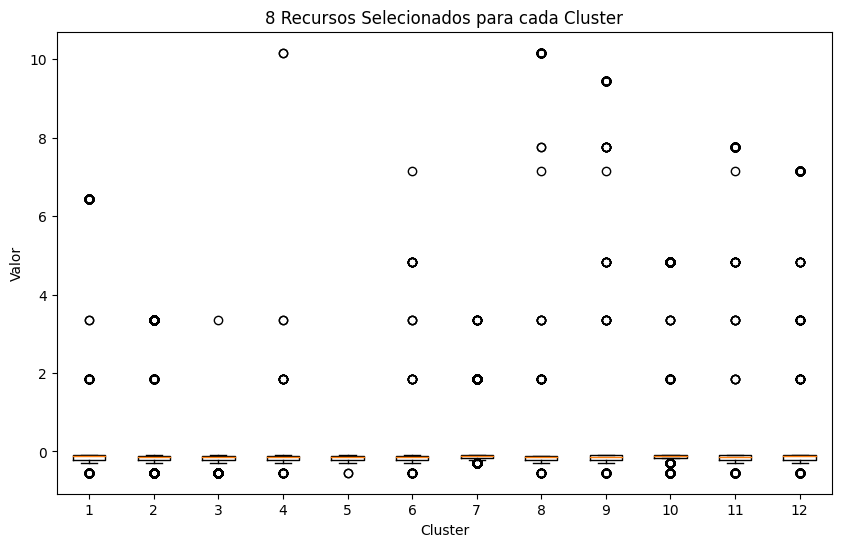

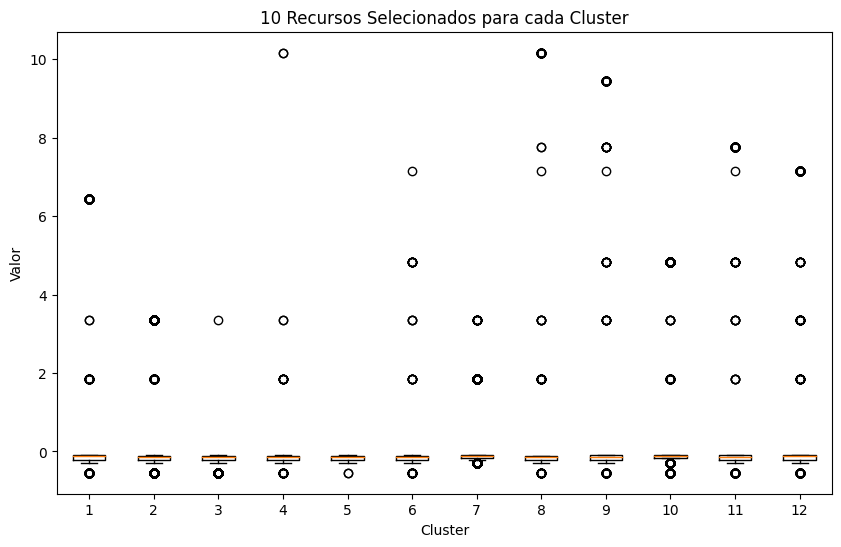

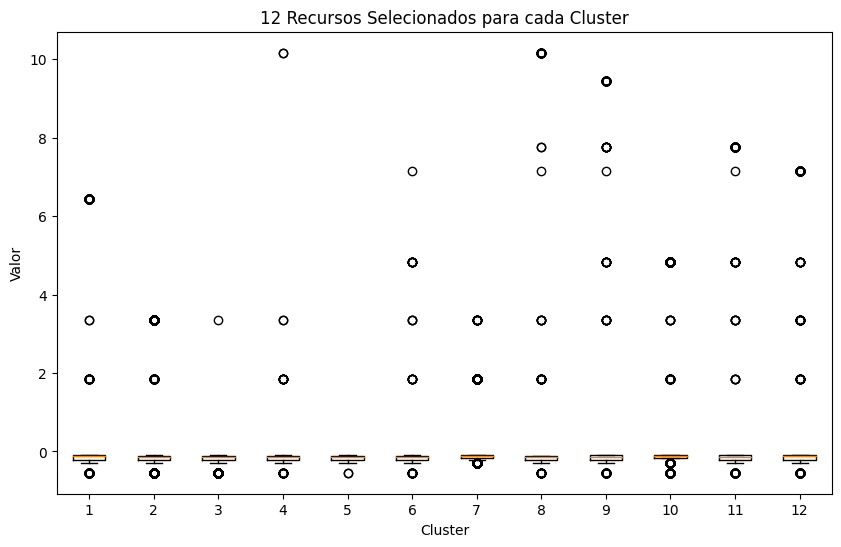

In [7]:
for j in [3, 5, 8, 10, 12]:
    # Criando clusters usando KMeans
    kmeans = KMeans(n_clusters = 12, random_state = 42)
    kmeans.fit(input_train)

    # Selecionando recursos importantes usando LassoCV
    # Selecionando 8 features com o parametro max_features=8
    lasso = LassoCV(cv=5)
    selection = SelectFromModel(estimator=lasso, threshold=-np.inf, max_features = 8)
    selection.fit(input_train, kmeans.labels_)
    selected_features_clustering = selection.get_support(indices=True)

    # Imprimindo os recursos selecionados
    print("Recursos selecionados: ", dataset.columns[selected_features_clustering])

    cluster_data = []
    for cluster_label in range(12):
        cluster_indices = np.where(kmeans.labels_ == cluster_label)[0]
        cluster_features = input_train[cluster_indices][:, selected_features_clustering]
        cluster_data.append(cluster_features.flatten())  # Ajuste da dimensão dos dados

    # Plotagem dos boxplots para cada cluster
    plt.figure(figsize=(10, 6))
    plt.boxplot(cluster_data, labels=np.arange(12)+1)
    plt.xlabel('Cluster')
    plt.ylabel('Valor')
    plt.title('{} Recursos Selecionados para cada Cluster'.format(j))
    plt.savefig('cluster_{}.png'.format(j), dpi=300, bbox_inches='tight')

Este método agrupa as features em clusters e seleciona as features mais importantes de cada cluster. Ele usa algoritmos de clustering para agrupar as features.

## Resultados


3 clusters ['age', 'on_thyroxine', 'query_hyperthyroid', 'goitre', 'T3', 'TT4',
'T4U', 'FTI']

5 clusters ['age', 'on_thyroxine', 'on_antithyroid_medication', 'tumor', 'goitre',
'T3', 'TT4', 'T4U']

8 clusters ['age', 'on_thyroxine', 'query_on_thyroxine', 'sick', 'T3', 'TT4', 'T4U',
'FTI']

10 clusters ['age', 'sex', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick',
'tumor', 'T3', 'T4U']

12 clusters ['sex', 'on_thyroxine', 'query_on_thyroxine', 'thyroid_surgery',
'query_hyperthyroid', 'pregnant', 'sick', 'goitre']

In [8]:
colunas = dataset.columns
print("Colunas:")
print(colunas)

# Exibir as cinco primeiras linhas
cinco_primeiras_linhas = dataset.head(5)
print("\nCinco primeiras linhas:")
print(cinco_primeiras_linhas)


Colunas:
Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

Cinco primeiras linhas:
   age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0   45    0             0                   0                          0   
1   64    0             0                   0                          0   
2   56    1             0                   0                          0   
3   78    0             1                   0                          0   
4   80    1             0                   0                          0   

   thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  \
0                0                  0                   0         0     0   
1                0                  0                   0         0     1   


In [22]:
# Exibir os nomes das colunas
print(dataset.columns)

Index(['classification', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')


In [25]:
from tabulate import tabulate

columns_to_select = ['classification', 'age', 'sex', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
selected_dataset = dataset[columns_to_select]

# Exibir as colunas
colunas = selected_dataset.columns.tolist()

# Exibir as cinco primeiras linhas
cinco_primeiras_linhas = dataset.head(5)

# Converter os dados em formato de lista de listas
dados = cinco_primeiras_linhas.values.tolist()

tabela = tabulate(dados, headers=colunas, tablefmt="latex")

# Imprimir a tabela
print(tabela)

\begin{tabular}{rrrrrrrrrrrrrrrrrrr}
\hline
    &    &    &    &    &    &    &   classification &   age &   sex &   sick &   tumor &   lithium &   goitre &   TSH &   T3 &   TT4 &   T4U &   FTI \\
\hline
  1 & 45 &  0 &  0 &  0 &  0 &  0 &                0 &     0 &     0 &      0 &       0 &         0 &        0 &  1.9  &  1   &    82 &  0.73 &   112 \\
  1 & 64 &  0 &  0 &  0 &  0 &  0 &                0 &     0 &     0 &      1 &       0 &         0 &        0 &  0.09 &  1   &   101 &  0.82 &   123 \\
  1 & 56 &  1 &  0 &  0 &  0 &  0 &                0 &     0 &     0 &      0 &       0 &         0 &        0 &  0    &  0.8 &    76 &  0.77 &    99 \\
  1 & 78 &  0 &  1 &  0 &  0 &  0 &                1 &     0 &     0 &      0 &       0 &         0 &        0 &  2.6  &  0.3 &    87 &  0.95 &    91 \\
  1 & 80 &  1 &  0 &  0 &  0 &  0 &                0 &     0 &     0 &      0 &       0 &         0 &        0 &  1.4  &  0.8 &   105 &  0.88 &   120 \\
\hline
\end{tabular}


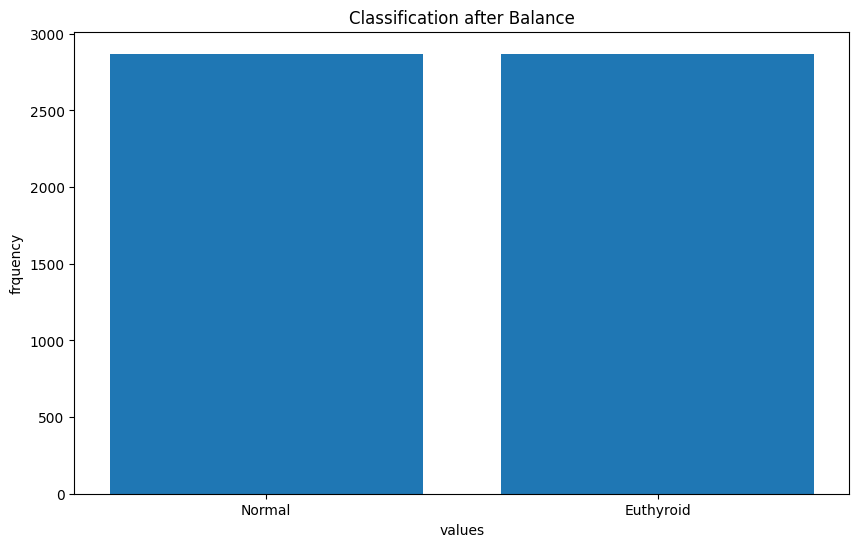

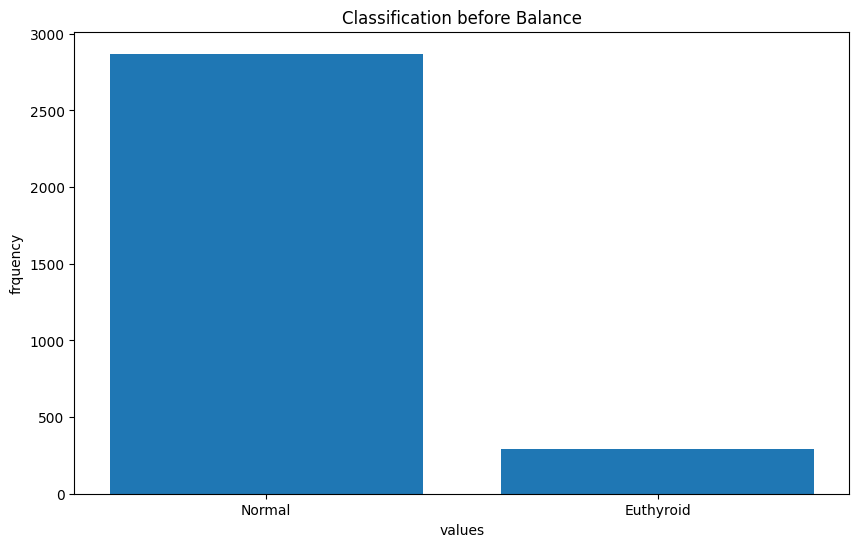

In [49]:

#Balanceando dos dados 
dataset_bal, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
output_label_dataset_bal = dataset_bal['classification']

output_label_dataset_des = dataset['classification']


# Função para criar o gráfico
def plot_grafico_barras(dados, title):
    labels = ['Normal', 'Euthyroid']
    count_0 = len(dados[dados == 0])
    count_1 = len(dados[dados == 1])
    contagem = [count_0, count_1]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, contagem)
    plt.xlabel('values')
    plt.ylabel('frquency')
    plt.title(title)
    plt.savefig(title, dpi=300)

# Chamar as funções para plotar os gráficos
plot_grafico_barras(output_label_dataset_bal, 'Classification after Balance')
plot_grafico_barras(output_label_dataset_des, 'Classification before Balance')
